# Ekstremi funkcija

## Lokalni ekstremi

**Definicija 1.** _Neka je $A \subseteq \mathbb{R^n}$ otvoren, $f: A\rightarrow \mathbb{R}$ i $c \in A.$_
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ maksimum_
$( \forall x \in U(c) \hspace{3mm} f(c) \ge f(x) ),$
_kažemo da je $c$ **lokalni maksimum**, a $f(c)$ je vrijednost lokalnog maksimuma._
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ minimum_
$(\forall x \in U(c) \hspace{3mm} f(c) \le f(x)),$
_kažemo da je $c$ **lokalni minimum**, a $f(c)$ je vrijednost lokalnog minimuma._
- _$c$ je **lokalni ekstrem** ako je lokalni minimum ili lokalni minimum funkcije $f$._

- _$c$ je **stacionarna točka** ako je funkcija $f$ diferencijabilna u $c$ i $Df(c) = 0$_

**Teorem 2. (Nužan uvjet za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ diferencijabilna u $c \in A$. Ako je $c$ lokalni ekstrem funkcije $f$ onda je $Df(c)=0$ (tj. $c$ je stacionarna točka funkcije $f$)._

**Teorem 3. (Dovoljni uvjeti za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ klase $C^2$._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je negativno definitna matrica onda $f$ ima lokalni maksimum u $c$._
- _Ako $f$ ima lokalni maksimum u $c$ onda je $H_f(c)$ negativno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je pozitivno definitna matrica onda $f$ ima lokalni minimum u $c$._
- _Ako $f$ ima lokalni minimum u $c$ onda je $H_f(c)$ pozitivno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je indefinitna matrica onda $f$ nema u točki $c$ lokalni ekstrem, tj. $c$ je sedlasta točka funkcije $f$._

Prethodna dva teorema nam daju način **kako analitički odrediti lokalne ekstreme** neke funkcije:
1. Odredimo sve točke $c \in A$ takve da $Df(c)=0$. Po Teoremu 2. one su kandidati za lokalne ekstreme.
2. Za njih izračunamo $H_f(c)$.
3. Iskoristimo Teorem 3.

In [455]:
import sympy as sym
import numpy as np
x,y = symbols('x y')

def f(x,y):
    return x**2 + y**2

fsym = f(x,y)

fxprime = sym.diff(fsym,x)
fyprime = sym.diff(fsym,y)

fxxprime = sym.diff(fxprime, x)
fxyprime = sym.diff(fxprime, y)
fyyprime = sym.diff(fyprime, y)

dfx = sym.lambdify((x,y), fxprime, "numpy")
dfy = sym.lambdify((x,y), fyprime, "numpy")

dfxx = sym.lambdify((x,y), fxxprime, "numpy")
dfxy = sym.lambdify((x,y), fxyprime, "numpy")
dfyy = sym.lambdify((x,y), fyyprime, "numpy")

Df = np.array( [fxprime, fyprime])

Hf = np.array( [ [fxxprime, fxyprime],
                 [fxyprime, fyyprime] ] )

Možemo izračunati gradijent i Hessian u nekoj točki, npr. u točki $(1,1)$ da vidimo je li u njoj lokalni ekstrem. Po obratu po kontrapoziciji Teorema 2 znamo da u $(1,1)$ nije lokalni ekstrem funkcije $f(x,y)=x^2+y^2$ jer $Df(1,1)=(2,2)$

In [456]:
np.array( [dfx(1,1), dfy(1,1)] )    # gradijent u (1,1)

array([2, 2])

In [457]:
np.array( [ [dfxx(1,1), dfxy(1,1)], [dfxy(1,1), dfyy(1,1)] ] )    # Hessian u (1,1)

array([[2, 0],
       [0, 2]])

**Primjer 4.** Nađimo lokalne ekstreme funkcije $f(x,y)=x^2+y^2$.

In [458]:
Df

array([2*x, 2*y], dtype=object)

In [459]:
solve(Df, symbols('x y'))

{x: 0, y: 0}

Jedini kandidat je točka $(0,0)$.

In [460]:
Hf

array([[2, 0],
       [0, 2]], dtype=object)

In [461]:
temp = np.array( [ [dfxx(0,0), dfxy(0,0)], [dfxy(0,0), dfyy(0,0)] ] )

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

is_pos_def(temp)

True

Vidimo da je $H_f(0,0)$ pozitivno definitna pa po Teoremu 3. zaključujemo da funkcija $f$ u $(0,0)$ ima lokalni minimum. Sljedeći graf potvrđuje naš nalaz.

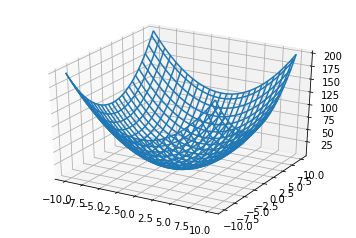

In [462]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = f(x,y)
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
#ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=1)

**Primjer 5.** Nađimo lokalne ekstreme funkcije $f(x,y)=-(x-2)^2-(y+1)^2$.

In [463]:
import sympy as sym
import numpy as np
x,y = symbols('x y')

def f(x,y):
    return -(x-2)**2 - (y+1)**2

fsym = f(x,y)

fxprime = sym.diff(fsym,x)
fyprime = sym.diff(fsym,y)

fxxprime = sym.diff(fxprime, x)
fxyprime = sym.diff(fxprime, y)
fyyprime = sym.diff(fyprime, y)

dfxx = sym.lambdify((x,y), fxxprime, "numpy")
dfxy = sym.lambdify((x,y), fxyprime, "numpy")
dfyy = sym.lambdify((x,y), fyyprime, "numpy")

Df = np.array( [fxprime, fyprime])

Hf = np.array( [ [fxxprime, fxyprime],
                 [fxyprime, fyyprime] ] )

In [464]:
solve(Df, symbols('x y'))

{x: 2, y: -1}

Jedini kandidat je točka $(2,-1)$.

In [465]:
temp = np.array( [ [dfxx(2,-1), dfxy(2,-1)], [dfxy(2,-1), dfyy(2,-1)] ] )
temp

array([[-2,  0],
       [ 0, -2]])

In [466]:
np.linalg.det(temp)    # det(temp)

4.0

Koristimo **Sylvesterov kriterij**. U našem slučaju:
$$\Delta _1 = h_1 = -2 < 0$$
$$\Delta _2 = det(H_f(2,-1)) = 4 > 0$$

Zaključujemo da je $H_f(2,-1)$ negativno definitna pa iz Teorema 3. slijedi da funkcija $f$ u $(2,-1)$ ima lokalni maksimum.

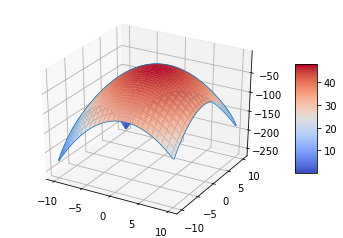

In [467]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = f(x,y)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=1)

**Primjer 6.** Nađimo lokalne ekstreme funkcije $f(x,y,z,w) = 5(x-3)^3 + 9(y-2)^2 - 9(z+3)^3 - 11(w+2)^2$.

In [468]:
import sympy as sym
import numpy as np
x,y,z,w = symbols('x y z w')

def f(x,y,z,w):
    return 5*(x-3)**2 + 9*(y-2)**2 - 9*(z+3)**3 - 11*(w+2)**2

fsym = f(x,y,z,w)

fxprime = sym.diff(fsym,x)
fyprime = sym.diff(fsym,y)
fzprime = sym.diff(fsym,z)
fwprime = sym.diff(fsym,w)

fxxprime = sym.diff(fxprime, x)
fxyprime = sym.diff(fxprime, y)
fxzprime = sym.diff(fxprime, z)
fxwprime = sym.diff(fxprime, w)

fyyprime = sym.diff(fyprime, y)
fyzprime = sym.diff(fyprime, z)
fywprime = sym.diff(fyprime, w)

fzzprime = sym.diff(fzprime, z)
fzwprime = sym.diff(fzprime, w)

fwwprime = sym.diff(fwprime, w)

dfxx = sym.lambdify((x,y,z,w), fxxprime, "numpy")
dfxy = sym.lambdify((x,y,z,w), fxyprime, "numpy")
dfxz = sym.lambdify((x,y,z,w), fxzprime, "numpy")
dfxw = sym.lambdify((x,y,z,w), fxwprime, "numpy")

dfyy = sym.lambdify((x,y,z,w), fyyprime, "numpy")
dfyz = sym.lambdify((x,y,z,w), fyzprime, "numpy")
dfyw = sym.lambdify((x,y,z,w), fywprime, "numpy")

dfzz = sym.lambdify((x,y,z,w), fzzprime, "numpy")
dfzw = sym.lambdify((x,y,z,w), fzwprime, "numpy")

dfww = sym.lambdify((x,y,z,w), fwwprime, "numpy")

Df = np.array( [fxprime, fyprime, fzprime, fwprime])

Hf = np.array( [ [fxxprime, fxyprime, fxzprime, fxzprime],
                 [fxyprime, fyyprime, fyzprime, fywprime],
                 [fxzprime, fyzprime, fzzprime, fzwprime],
                 [fxwprime, fywprime, fzwprime, fwwprime] ] )

In [469]:
Df

array([10*x - 30, 18*y - 36, -27*(z + 3)**2, -22*w - 44], dtype=object)

In [470]:
tocka = solve(Df, symbols('x y z w'))
tocka

[(3, 2, -3, -2)]

In [471]:
Hf

array([[10, 0, 0, 0],
       [0, 18, 0, 0],
       [0, 0, -54*z - 162, 0],
       [0, 0, 0, -22]], dtype=object)

In [472]:
temp = np.array( [ [ dfxx(3, 2, -3, -2), dfxy(3, 2, -3, -2), dfxz(3, 2, -3, -2), dfxw(3, 2, -3, -2) ], 
                   [ dfxy(3, 2, -3, -2), dfyy(3, 2, -3, -2), dfyz(3, 2, -3, -2), dfyw(3, 2, -3, -2) ],
                   [ dfxz(3, 2, -3, -2), dfyz(3, 2, -3, -2), dfzz(3, 2, -3, -2), dfzw(3, 2, -3, -2) ], 
                   [ dfxw(3, 2, -3, -2), dfyw(3, 2, -3, -2), dfzw(3, 2, -3, -2), dfww(3, 2, -3, -2) ] ] )
temp

array([[ 10,   0,   0,   0],
       [  0,  18,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0, -22]])

In [473]:
Delta1 = temp[0,0]
Delta1

10

In [474]:
Delta2 = np.linalg.det( temp[ [0,1],:] [:,[0,1] ] )
Delta2

180.0

In [475]:
Delta3 = np.linalg.det( temp[ [0,1,2],:] [:,[0,1,2] ] )
Delta3

0.0

In [476]:
Delta4 = np.linalg.det( temp )
Delta4

0.0

Imamo: $$\Delta _1 = 10 > 0$$
       $$\Delta _2 = 180 > 0$$
       $$\Delta _3 = 0 \ge 0$$
       $$\Delta _4 = 0 \ge 0$$
       
Slijedi da je $H_f(3,2,-3,2)$ pozitivno semidefinitna.

U $(3,2,-3,2)$ može biti lokalni minimum ili sedlasta točka.